In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime
import pandas_datareader.data as web

# Musical Chairs
Suppose you have 100 people sitting in a circle, numbered consequtively 1,2,$\dots$,100. Suppose person 1 shoots the person in front of them (person 2) and hands to gun to person 3. Person 3 takes the gun, shoots person 4 and hands the gun to person 5. Who is the last person standing?

In [141]:
class MusicalChairs(object):
    def __init__(self,N, k):
        self.N = N
        self.k = k
    
    def init(self):
        self.chairs = np.arange(self.N)
    
    def play(self):
        i = 0
        while len(self.chairs) > 1:
            n = (i + self.k)%len(self.chairs)
            self.chairs = np.delete(self.chairs, n)
            i += 1
            i = i%(len(self.chairs))
            if n < i:
                i -= 1
        print(self.chairs[0])

In [142]:
play = MusicalChairs(100, 1)
play.init()
play.play()

72


In [50]:
# Define time interval
start = datetime.datetime(2001, 1, 20)
end = datetime.datetime(2020, 1, 11)

# Import data
df = web.DataReader(['^GSPC', '^IXIC'], 'yahoo', start, end)['Adj Close']

# Take a peak at the data
df.head()

Symbols,^GSPC,^IXIC
Date,,
2001-01-22,1342.900024,2757.909912
2001-01-23,1360.400024,2840.389893
2001-01-24,1364.300049,2859.149902
2001-01-25,1357.510010,2754.280029
2001-01-26,1354.949951,2781.300049


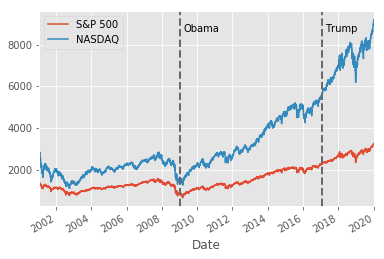

In [51]:
#close_prc = df['Adj Close']

plt.figure()
df['^GSPC'].plot(label='S&P 500')
df['^IXIC'].plot(label='NASDAQ')
plt.axvline(pd.to_datetime('2009-01-20'), color='dimgray', linestyle='--', lw=2)
plt.axvline(pd.to_datetime('2017-01-20'), color='dimgray', linestyle='--', lw=2)
plt.annotate('Obama', (pd.to_datetime('2009-04-02'), 8600))
plt.annotate('Trump', (pd.to_datetime('2017-04-02'), 8600))
plt.legend()